# Data Visualization

https://matplotlib.org/

Creating a Plot

In [ ]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

## Customizing your Plots

In [ ]:
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],color= 'b', marker = 'o', linestyle = '--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = "r", marker = 'v', linestyle = '--')

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')

# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Call show to display the resulting plot
plt.show()


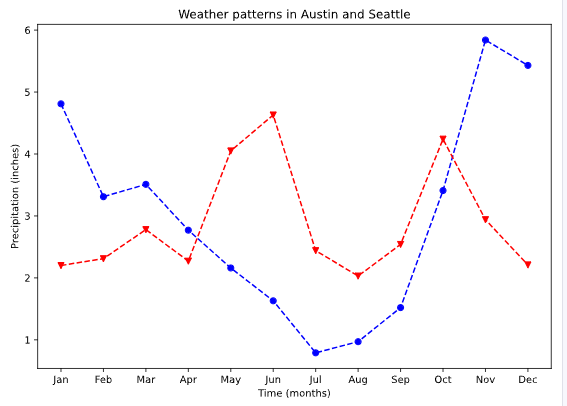

## Small Multiple Plotting


### 2 x 2 Graphs

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

plt.show()

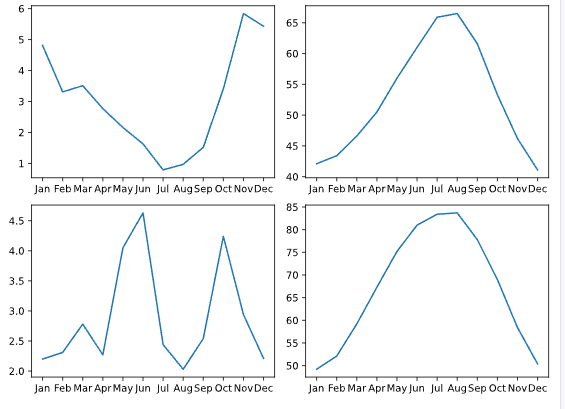

### 2 x 1 Graphs

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = "--")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = "--")

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'r')
ax[1].plot(austin_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = "--")
ax[1].plot(austin_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = "--")

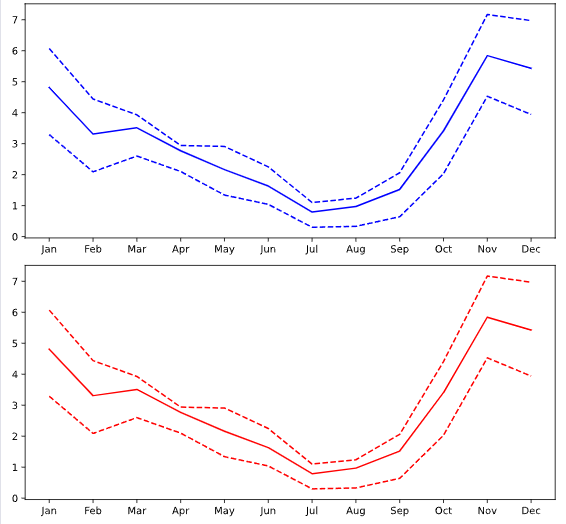

## Plotting Time Series

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

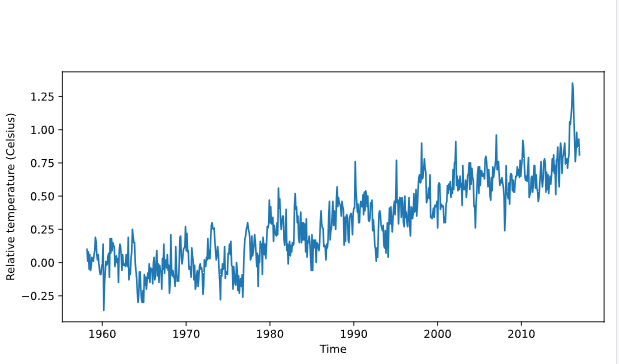

In [ ]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01" : "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

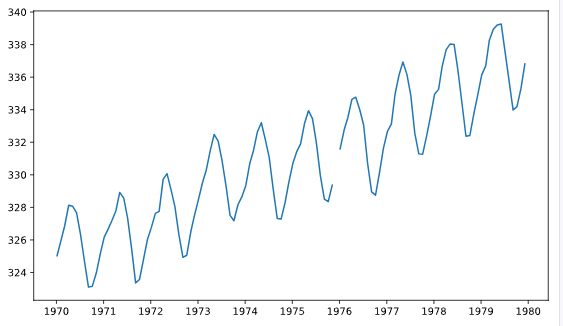

### Plotting two time series together

In [ ]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)


fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temperature (Celsius)")

plt.show()

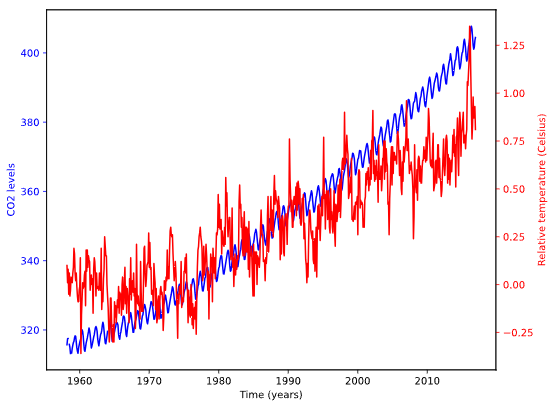

### Anottating Time Series Data

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

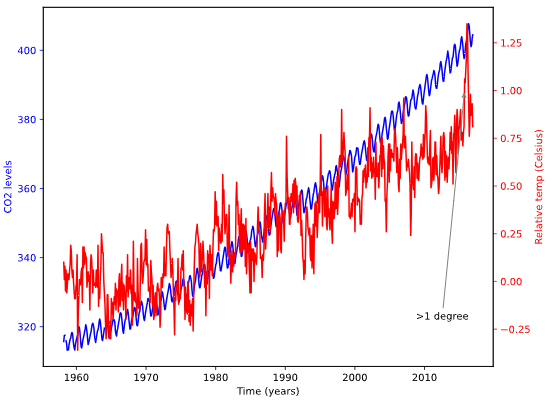

## Quantitative comparisons

### Bar Charts

In [ ]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold", color = 'gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver", color = 'silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze", color = "orange")

# Display the legend
ax.legend()

plt.show()

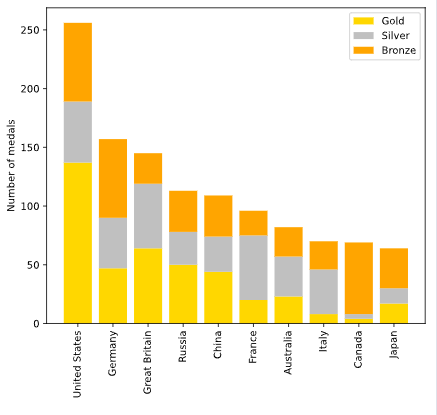

### Histograms

In [ ]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], histtype='step', label="Rowing", bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], histtype='step', label="Gymnastics", bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

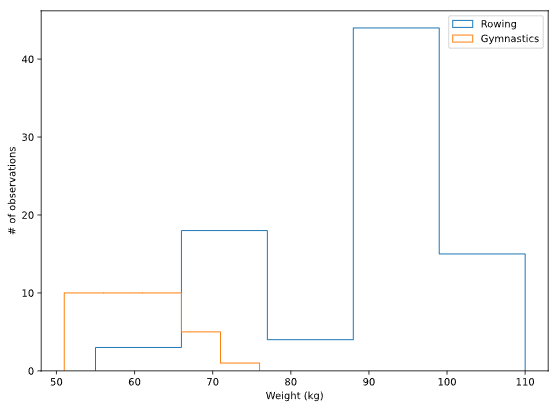

## Statistical Plotting

### Error Bars

In [ ]:
fig, ax = plt.subplots()

# Add the Seattle temperature data in each month with standard deviation error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add the Austin temperature data in each month with standard deviation error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

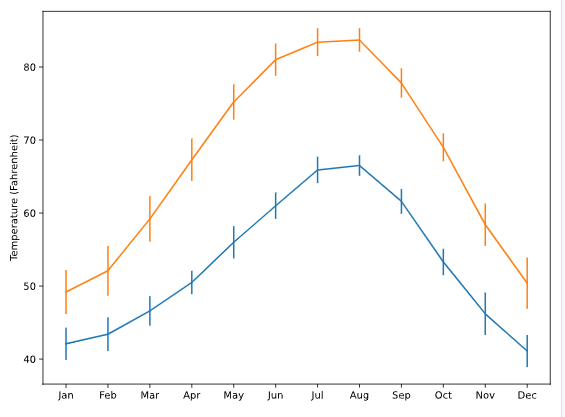

### Box-Plots

In [ ]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

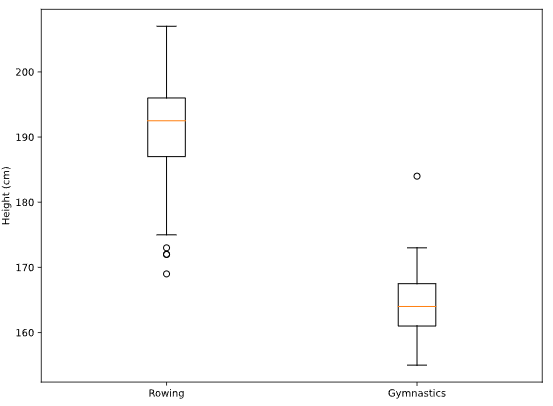

### Scatter Plots and Enconding time in color

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

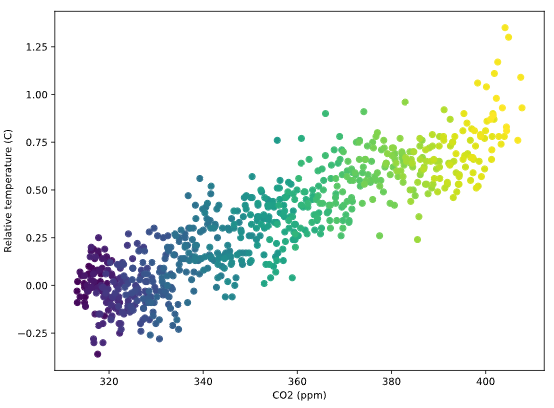

## Sharing Visualization

### Saving Image of the Plot

In [ ]:
fig, ax = plt.subplots()
# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)
# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")
# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")
plt.show()

# Set figure dimensions and save as a PNG
fig.set_size_inches([3, 5])

# Save as a PNG file with 300 dpi
fig.savefig('my_figure_300dpi.svg', dpi=300) # Svg, Png, jpg.... Dpi or quality

### Automating Figures from Data

In [ ]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")